In [ ]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# All timing are in micro seconds (us)

In [2]:
gs_columns = ["Grayskull | BF16 M4", "Grayskull | BF16 M2"]
v100_column = 'NVIDIA V100 | FP16'
p100_column = 'NVIDIA P100 | FP16'
a100_column = 'NVIDIA A100 | BF16'
a100_b_column = 'NVIDIA A100 | BF16'
sr_column = 'Sapphire Rapids | BF16'


In [3]:
# df = pd.read_csv("./results/oob_pw.csv")
df = pd.read_csv("./results/op_pw.csv")
df = df[df['m'] != 256]
df = df[df['m'] != 3072]

df = df[(df['conf'] == "f16_m4") | (df['conf'] == "f16_m2")]
df.sort_values(by=['conf'], inplace=True,ascending=False)
pd.options.display.max_rows = 90
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df.reset_index(inplace=True, drop = True)
df


,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
0,f16_m4,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1.56%,1.14%,262.360573,1.023155,0.7600,43.0,34.0,1000.0,51.62500,300
1,f16_m4,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,12.63%,9.19%,259.447893,8.277129,0.7600,43.0,34.0,1000.0,52.06250,300
2,f16_m4,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,39.84%,28.98%,657.918453,26.112460,0.7600,43.0,34.0,1000.0,51.93750,300
3,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.29%,24.94%,6115.464369,22.474001,0.7595,55.5,42.5,1000.0,53.18750,300
4,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.07%,27.69%,44070.449670,24.948954,0.7600,57.5,44.0,999.5,54.59375,300
5,f16_m2,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,0.81%,0.59%,253.847440,1.057468,0.7600,33.0,24.0,1000.0,42.81250,300
6,f16_m2,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,6.00%,4.36%,273.054441,7.864672,0.7600,35.0,25.0,1000.0,44.87500,300
7,f16_m2,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,33.30%,24.22%,393.574238,43.650899,0.7600,38.0,28.0,1000.0,46.68750,300
8,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,24.84%,18.06%,4221.470356,32.557129,0.7600,55.0,41.0,992.0,51.03125,300
9,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29.61%,21.54%,28328.593572,38.812786,0.7485,57.5,43.5,985.5,52.78125,300


In [4]:
df_a100_b = pd.read_csv("./results/gpu/old_wrong_power/a100_bf16.csv")
df_a100_b = df_a100_b[df_a100_b['m'] != 256]
df_a100_b = df_a100_b[df_a100_b['m'] != 3072]
df_a100_b

,m,run,tflops,power
1,512,21.425883,12.528675,71.295000
2,1024,34.289095,62.629341,73.530667
3,2048,143.459638,119.915428,95.636500
5,4096,675.843027,203.371524,230.338167
6,8192,4337.943395,253.464361,257.077500


In [88]:
df_a100 = pd.read_csv("./results/gpu/a100_bf16.csv")
df_a100 = df_a100[df_a100['m'] != 256]
df_a100 = df_a100[df_a100['m'] != 3072]
df_a100['power'] = df_a100['powermon']
df_a100

,m,run,tflops,power,powermon
0,512,20.181584,13.301369,92.854167,92.854167
1,1024,32.446591,66.221351,142.136833,142.136833
2,2048,128.530645,133.682592,285.512714,285.512714
3,4096,570.374608,240.981006,441.987516,441.987516
4,8192,3810.023729,288.584138,473.293296,473.293296


In [6]:
df_sf = pd.read_csv("./results/cpu/torch_bfp16_gmtg.csv")
df_sf = df_sf[df_sf['m'] != 256]
df_sf = df_sf[df_sf['m'] != 3072]
df_sf['tflops'] = 2 * (df_sf['m']**3) / 1e6  / df_sf['torch_bfp16_gmtg']
df_sf['run'] = df_sf['torch_bfp16_gmtg']
df_sf.drop('torch_bfp16_gmtg', axis=1, inplace=True)
df_sf

,m,tflops,run
1,512,2.840384,94.506741
2,1024,14.657531,146.510601
3,2048,11.643602,1475.477219
5,4096,20.595335,6673.305035
6,8192,26.143616,42056.601048


In [89]:
df_v100 = pd.read_csv("./results/gpu/v100_fp16.csv")
df_v100 = df_v100[df_v100['m'] != 256]
df_v100 = df_v100[df_v100['m'] != 3072]
df_v100.reset_index(inplace=True, drop = True)
df_v100['power'] = df_v100['powermon']
df_v100

,m,run,tflops,power,powermon
0,512,35.935227,7.478657,68.798583,68.798583
1,1024,54.485035,39.482925,187.114889,187.114889
2,2048,247.664007,69.372879,240.312948,240.312948
3,4096,1691.130654,81.272489,244.564065,244.564065
4,8192,12803.801107,85.873946,245.518734,245.518734


In [90]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [91]:
df_inf = get_column_df_info(df, 'run')
df_inf.columns = gs_columns
df_inf[v100_column] = df_v100['run'].values
df_inf[a100_column] = df_a100['run'].values
df_inf[sr_column] = df_sf['run'].values
df_inf

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16,Sapphire Rapids | BF16
512,262.360573,253.847440,35.935227,20.181584,94.506741
1024,259.447893,273.054441,54.485035,32.446591,146.510601
2048,657.918453,393.574238,247.664007,128.530645,1475.477219
4096,6115.464369,4221.470356,1691.130654,570.374608,6673.305035
8192,44070.449670,28328.593572,12803.801107,3810.023729,42056.601048


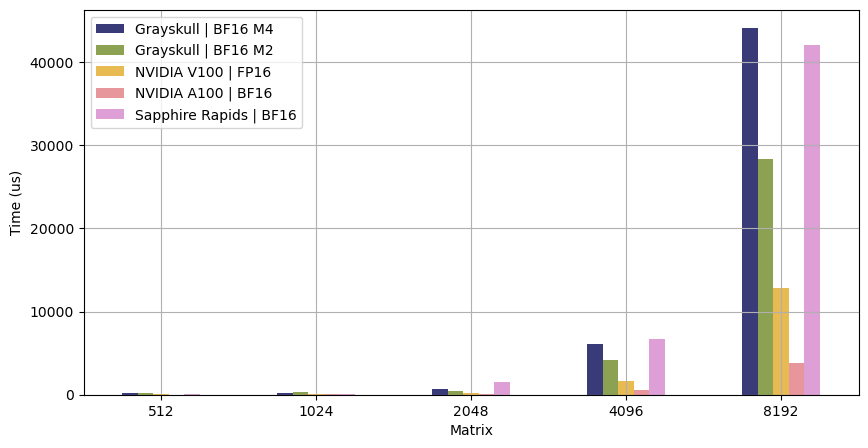

In [92]:
p = df_inf.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_ylabel('Time (us)')
p.set_xlabel('Matrix')
plt.grid(True)

plt.show()

## GFLOPS

In [93]:
df_tflops = get_column_df_info(df, 'tflops')
df_tflops.columns = gs_columns
# df_tflops[p100_column] = df_p100['tflops'].values
df_tflops[v100_column] = df_v100['tflops'].values
df_tflops[a100_column] = df_a100['tflops'].values
df_tflops[sr_column] = df_sf['tflops'].values
df_tflops

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16,Sapphire Rapids | BF16
512,1.023155,1.057468,7.478657,13.301369,2.840384
1024,8.277129,7.864672,39.482925,66.221351,14.657531
2048,26.112460,43.650899,69.372879,133.682592,11.643602
4096,22.474001,32.557129,81.272489,240.981006,20.595335
8192,24.948954,38.812786,85.873946,288.584138,26.143616


In [94]:
def calculate_matrix_size(m, element_size=2):
    # Calculate the size in bytes
    size_in_bytes = m * m * element_size
    # Convert to megabytes
    size_in_megabytes = size_in_bytes / (1024 * 1024)
    return size_in_megabytes

# Example usage
m = 3072
matrix_size_mb = calculate_matrix_size(m)
print(f"The size of a {m}x{m} matrix is {matrix_size_mb} MB")

The size of a 3072x3072 matrix is 18.0 MB


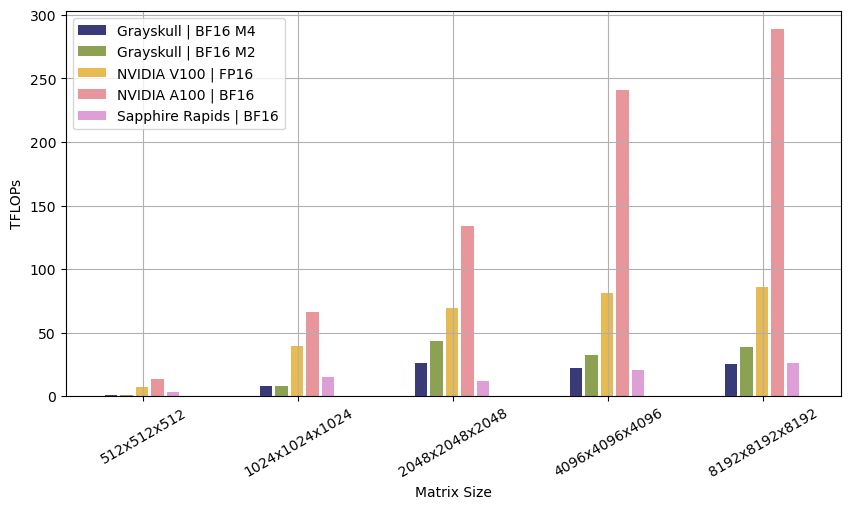

In [ ]:
fig, ax = plt.subplots()

# df_tflops.drop(index=256, inplace=True)
p = df_tflops.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)
    
# Adjust the width of the bars and the spacing between them
# for bar in ax.patches:
#     if ax.patches.index(bar) % len(df_tflops.columns) == 0:
#         bar.set_facecolor(colors[-1])
#     elif ax.patches.index(bar) % len(df_tflops.columns) == len(df_tflops.columns) - 1:
#         bar.set_facecolor(colors[0])
#     bar.set_width(bar.get_width() * 0.8)

color_list = []
for i in range(4):
    color_list.append(ax.get_legend().get_patches()[i].get_facecolor())


p.set_xticklabels([f"{m}x{m}x{m}" for m in df_tflops.index], rotation=30)
p.set_ylabel('TFLOPs')
plt.grid(True)


p.set_xlabel('Matrix Size')
plt.show()

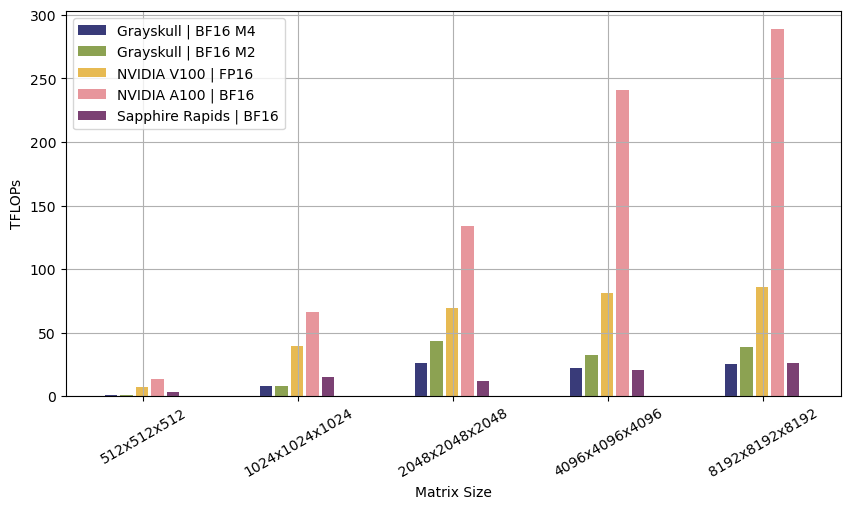

In [141]:
fig, ax = plt.subplots()

# 1, 5, 10, 15
color_list[4] = matplotlib.colormaps['tab20b'](16)

# df_tflops.drop(index=256, inplace=True)
p = df_tflops.plot(kind='bar', figsize=(10, 5), color=color_list, rot=0, ax=ax)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)


p.set_xticklabels([f"{m}x{m}x{m}" for m in df_tflops.index], rotation=30)
p.set_ylabel('TFLOPs')
plt.grid(True)


p.set_xlabel('Matrix Size')
plt.show()

## Power

In [96]:
df_power = get_column_df_info(df, 'power')
df_power.columns = gs_columns
# df_power[p100_column] = df_p100['power'].values
df_power[v100_column] = df_v100['power'].values
df_power[a100_column] = df_a100['power'].values
# df_power[sr_column] = 0
df_power

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16
512,34.0,24.0,68.798583,92.854167
1024,34.0,25.0,187.114889,142.136833
2048,34.0,28.0,240.312948,285.512714
4096,42.5,41.0,244.564065,441.987516
8192,44.0,43.5,245.518734,473.293296


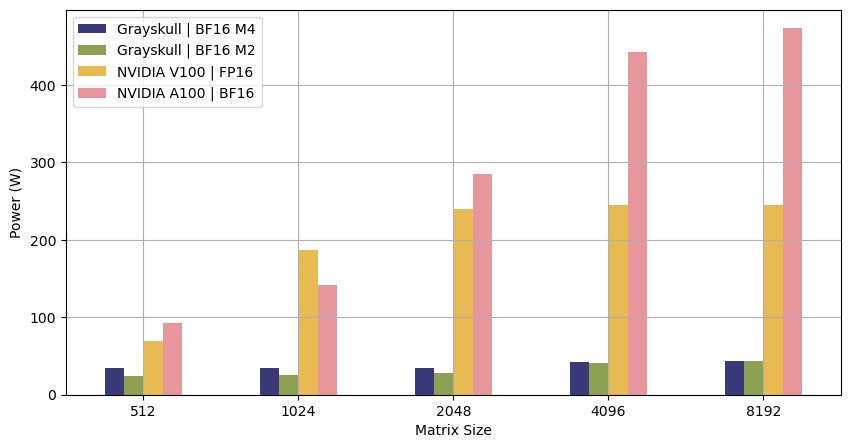

In [119]:
p = df_power.plot(kind='bar', figsize=(10, 5), rot=0, color=color_list)
p.set_xlabel("Matrix Size")
p.set_ylabel("Power (W)")
plt.grid(True)

plt.show()

## GFLOPS per Watt

In [98]:
df_tflops

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16,Sapphire Rapids | BF16
512,1.023155,1.057468,7.478657,13.301369,2.840384
1024,8.277129,7.864672,39.482925,66.221351,14.657531
2048,26.112460,43.650899,69.372879,133.682592,11.643602
4096,22.474001,32.557129,81.272489,240.981006,20.595335
8192,24.948954,38.812786,85.873946,288.584138,26.143616


In [99]:
df_power

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16
512,34.0,24.0,68.798583,92.854167
1024,34.0,25.0,187.114889,142.136833
2048,34.0,28.0,240.312948,285.512714
4096,42.5,41.0,244.564065,441.987516
8192,44.0,43.5,245.518734,473.293296


In [100]:
df_gflops_w = df_tflops / df_power 
df_gflops_w
df_gflops_w.drop("Sapphire Rapids | BF16", axis=1, inplace=True)
df_gflops_w = df_gflops_w[df_gflops_w.columns[:-2].tolist() + df_gflops_w.columns[-2:].tolist()[::-1]]
df_gflops_w = df_gflops_w[df_gflops_w.columns[1::-1].tolist() + df_gflops_w.columns[2:].tolist()]

In [101]:
df_gflops_w

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16
512,0.030093,0.044061,0.108704,0.143250
1024,0.243445,0.314587,0.211009,0.465899
2048,0.768014,1.558961,0.288677,0.468219
4096,0.528800,0.794076,0.332316,0.545221
8192,0.567022,0.892248,0.349765,0.609736


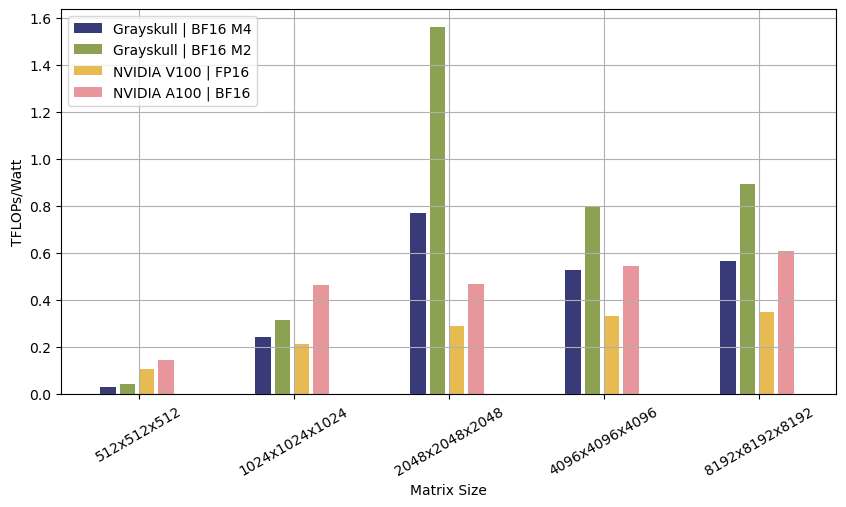

In [102]:
fig, ax = plt.subplots()
p = df_gflops_w.plot(kind='bar', figsize=(10, 5), color=color_list, rot=0, ax=ax)

# for container in ax.containers:
    # labels = [f'{v.get_height():.2f}' for v in container]
    # ax.bar_label(container, labels=labels, padding=5, label_type='edge', fmt='%.2f', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    # ax.bar_label(container, padding=5, label_type='edge', fmt='%.2f')

# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.legend(loc='upper left')
p.set_ylabel('TFLOPs/Watt')

p.set_xticklabels([f"{m}x{m}x{m}" for m in df_gflops_w.index], rotation=30)
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()


## Kernel efficiency

In [103]:
# AVX-512
tp_sr = 2.0 * 112 * 2 * (512 / 16) * 2 / 1e3
tp_sr

28.672

In [104]:
512/16 * 2

64.0

In [105]:
# AMX
tp_sr = (2.0 * 112 * 1024) / 1e3
tp_sr

229.376

In [106]:
# theorethical peak
tp_grayskull = 55
tp_p100 = 18.7
tp_v100 = 112
tp_a100 = 312
# GFLOPS Sapphire Rapids
# frq * n_core * n_AVX-512 * (AVX-512_len / bit) * n_op
# tp_sr = 2.0 * 112 * 2 * (512 / 16) * 2 / 1e3

In [107]:
df_gflops_e = df_tflops.copy()
df_gflops_e[gs_columns] = df_gflops_e[gs_columns] / tp_grayskull
# df_gflops_e[p100_column] = df_gflops_e[p100_column] / tp_p100
df_gflops_e[v100_column] = df_gflops_e[v100_column] / tp_v100
df_gflops_e[a100_column] = df_gflops_e[a100_column] / tp_a100
df_gflops_e[sr_column] = df_gflops_e[sr_column] / tp_sr
df_gflops_e = df_gflops_e * 100
df_gflops_e

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16,Sapphire Rapids | BF16
512,1.860281,1.922668,6.677372,4.263259,1.238309
1024,15.049325,14.299404,35.252611,21.224792,6.390176
2048,47.477200,79.365270,61.940070,42.846985,5.076208
4096,40.861820,59.194779,72.564723,77.237502,8.978854
8192,45.361735,70.568701,76.673167,92.494916,11.397712


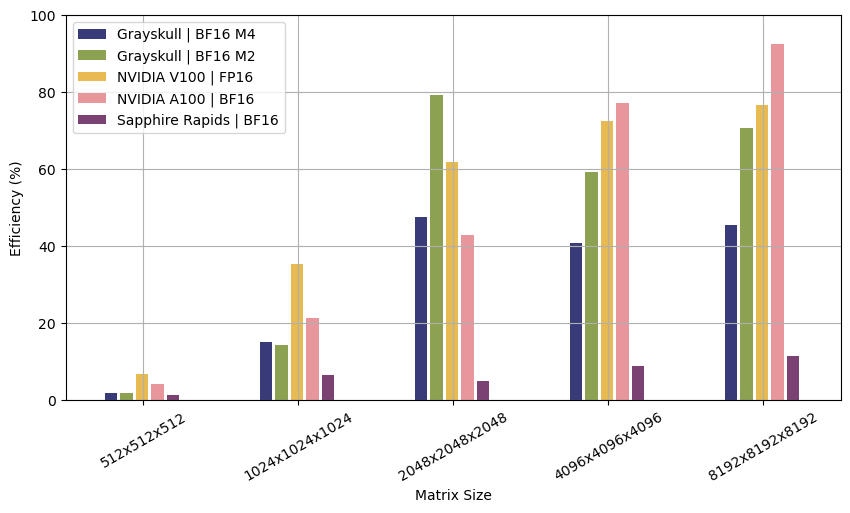

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
p = df_gflops_e.plot(kind="bar", color=color_list, ax=ax, rot=0)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.legend(loc='upper left')
p.set_ylabel('Efficiency (%)')
p.set_ylim(0, 100)
p.set_xticklabels([f"{m}x{m}x{m}" for m in df_gflops_w.index], rotation=30)
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()

## TFLOPs per Dollar

In [109]:
conf = 'bfloat16_m4'
cost_gs = 599
cost_sr = 10710.00
cost_a100 = 18000
cost_v100 = 9000

In [110]:
df_gflops_c = df_tflops.copy()
df_gflops_c[gs_columns] = df_gflops_c[gs_columns] / cost_gs
# df_gflops_c[p100_column] = df_gflops_c[p100_column] / tp_p100
df_gflops_c[v100_column] = df_gflops_c[v100_column] / cost_v100
df_gflops_c[a100_column] = df_gflops_c[a100_column] / cost_a100
df_gflops_c[sr_column] = df_gflops_c[sr_column] / cost_sr
df_gflops_c = df_gflops_c * 100
df_gflops_c

,Grayskull | BF16 M4,Grayskull | BF16 M2,NVIDIA V100 | FP16,NVIDIA A100 | BF16,Sapphire Rapids | BF16
512,0.170810,0.176539,0.083096,0.073896,0.026521
1024,1.381825,1.312967,0.438699,0.367896,0.136858
2048,4.359342,7.287295,0.770810,0.742681,0.108717
4096,3.751920,5.435247,0.903028,1.338783,0.192300
8192,4.165101,6.479597,0.954155,1.603245,0.244105


<Axes: >

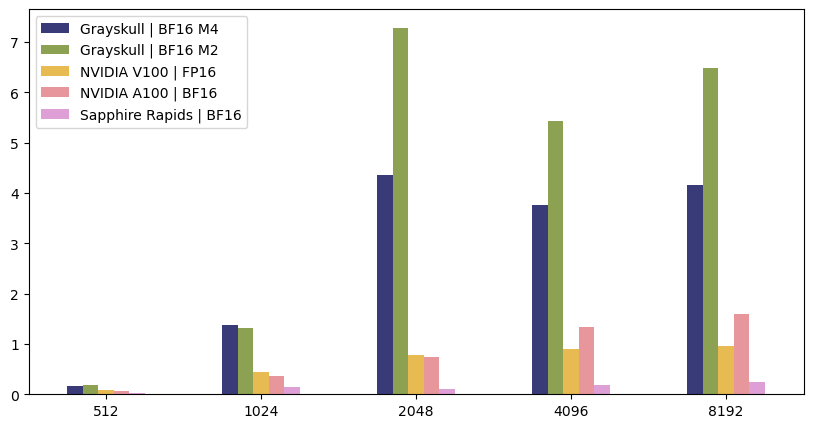

In [111]:
df_gflops_c.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)